## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
from tqdm import tqdm

df = pd.read_feather('./experiment/analysis_result.ftr')

models = ('model1', 'model2', 'model3')
categories = ('gold', 'creep', 'kda', 'avg', 'avg_nocreep')

analysis = defaultdict(lambda: defaultdict(lambda: np.zeros([10, 10], dtype=np.int32)))

for row in tqdm(df.itertuples(), total=len(df)):
    for cat in categories:
        for model in models:
            analysis[model][cat][getattr(row, f'score_{model}')][getattr(row, cat)] += 1

100%|██████████| 455750/455750 [00:10<00:00, 42441.32it/s]


## Gold 획득량 순위와 모델 스코어 간의 관계

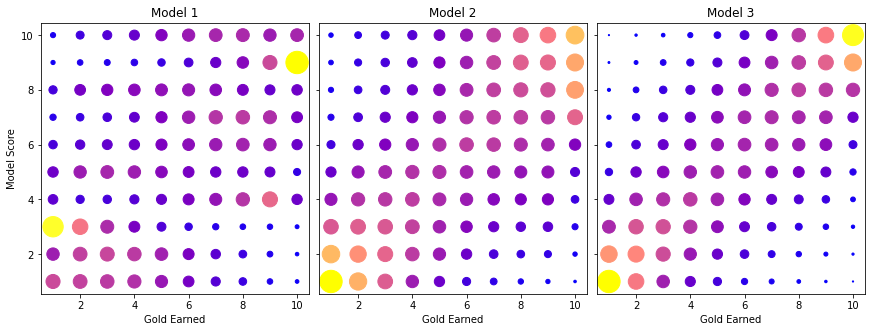

In [12]:
dfs = [analysis[model]['gold'] for model in models]
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5), sharey=True, constrained_layout=True)

axis_x, axis_y = zip(*[(x+1, y+1) for y in range(10) for x in range(10)])
for i in range(3):
    count = [dfs[i][x][y] for x in range(10) for y in range(10)]
    size = count/max(count)*500
    color = [(min(2*c/max(count), 1), min(max(2*c/max(count)-0.5, 0), 1), 1-(c/max(count))) for c in count]
    axes[i].set_title(f'Model {i+1}')
    axes[i].set_xlabel('Gold Earned')
    if i==0: axes[i].set_ylabel('Model Score')
    axes[i].scatter(x=axis_x, y=axis_y, s=size, c=color)

## KDA 순위와 모델 스코어 간의 관계

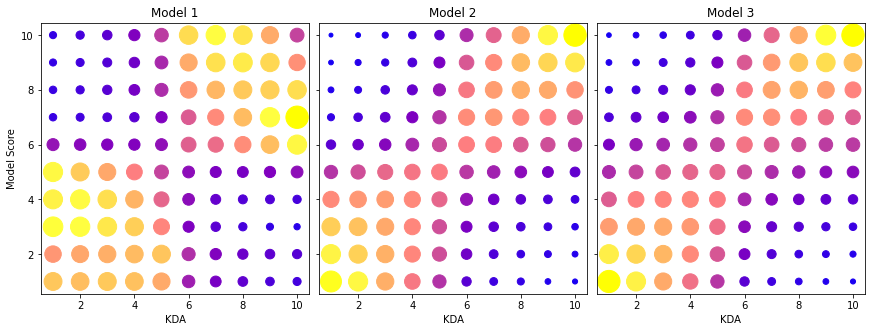

In [13]:
dfs = [analysis[model]['kda'] for model in models]
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5), sharey=True, constrained_layout=True)

axis_x, axis_y = zip(*[(x+1, y+1) for y in range(10) for x in range(10)])
for i in range(3):
    count = [dfs[i][x][y] for x in range(10) for y in range(10)]
    size = count/max(count)*500
    color = [(min(2*c/max(count), 1), min(max(2*c/max(count)-0.5, 0), 1), 1-(c/max(count))) for c in count]
    axes[i].set_title(f'Model {i+1}')
    axes[i].set_xlabel('KDA')
    if i==0: axes[i].set_ylabel('Model Score')
    axes[i].scatter(x=axis_x, y=axis_y, s=size, c=color)

## Creep score 순위와 모델 스코어 간의 관계

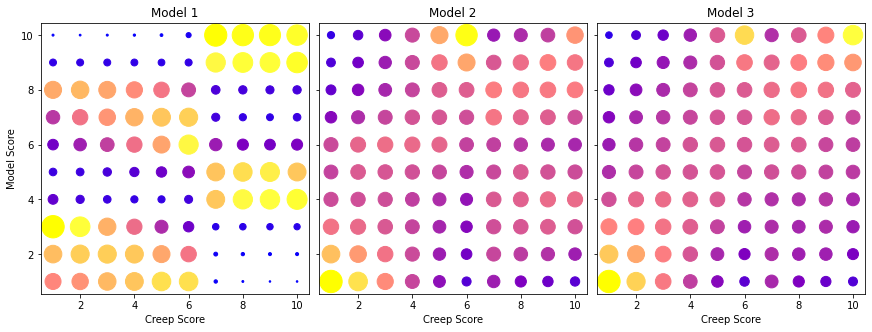

In [14]:
dfs = [analysis[model]['creep'] for model in models]
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5), sharey=True, constrained_layout=True)

axis_x, axis_y = zip(*[(x+1, y+1) for y in range(10) for x in range(10)])
for i in range(3):
    count = [dfs[i][x][y] for x in range(10) for y in range(10)]
    size = count/max(count)*500
    color = [(min(2*c/max(count), 1), min(max(2*c/max(count)-0.5, 0), 1), 1-(c/max(count))) for c in count]
    axes[i].set_title(f'Model {i+1}')
    axes[i].set_xlabel('Creep Score')
    if i==0: axes[i].set_ylabel('Model Score')
    axes[i].scatter(x=axis_x, y=axis_y, s=size, c=color)

## 기존 지표 평균과 모델 스코어 간의 관계

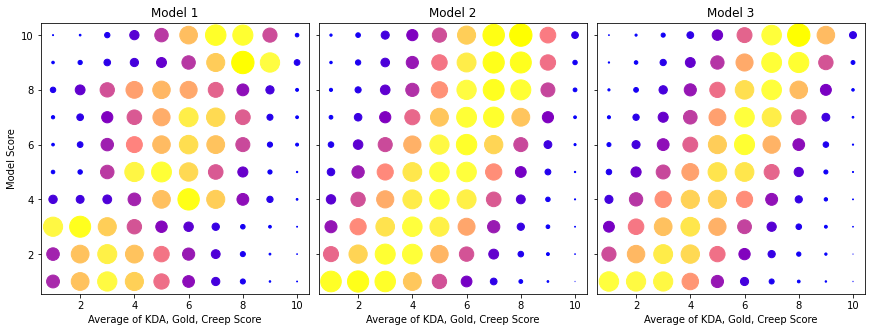

In [15]:
dfs = [analysis[model]['avg'] for model in models]
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5), sharey=True, constrained_layout=True)

axis_x, axis_y = zip(*[(x+1, y+1) for y in range(10) for x in range(10)])
for i in range(3):
    count = [dfs[i][x][y] for x in range(10) for y in range(10)]
    size = count/max(count)*500
    color = [(min(2*c/max(count), 1), min(max(2*c/max(count)-0.5, 0), 1), 1-(c/max(count))) for c in count]
    axes[i].set_title(f'Model {i+1}')
    axes[i].set_xlabel('Average of KDA, Gold, Creep Score')
    if i==0: axes[i].set_ylabel('Model Score')
    axes[i].scatter(x=axis_x, y=axis_y, s=size, c=color)

## 기존 지표 평균(creep score 제외)과 모델 스코어 간의 관계

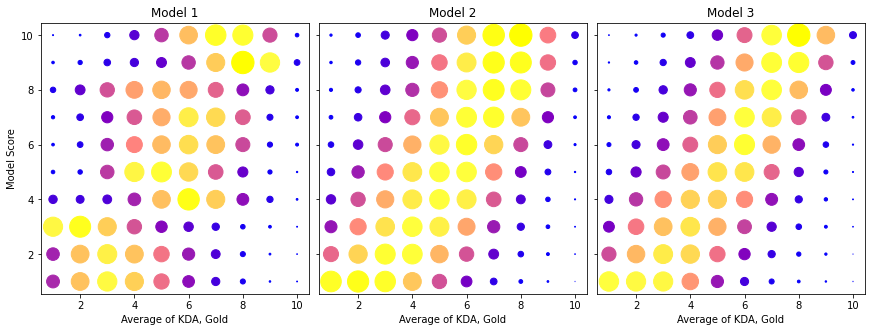

In [16]:
dfs = [analysis[model]['avg'] for model in models]
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5), sharey=True, constrained_layout=True)

axis_x, axis_y = zip(*[(x+1, y+1) for y in range(10) for x in range(10)])
for i in range(3):
    count = [dfs[i][x][y] for x in range(10) for y in range(10)]
    size = count/max(count)*500
    color = [(min(2*c/max(count), 1), min(max(2*c/max(count)-0.5, 0), 1), 1-(c/max(count))) for c in count]
    axes[i].set_title(f'Model {i+1}')
    axes[i].set_xlabel('Average of KDA, Gold')
    if i==0: axes[i].set_ylabel('Model Score')
    axes[i].scatter(x=axis_x, y=axis_y, s=size, c=color)

## 각 지표와 모델 점수간의 오차(MSE)

In [19]:
def mse(x:list, y:list):
    errs = [(xi - yi)**2 for xi, yi in zip(x, y)]
    err = sum(errs) / len(errs)
    return err

# model1
for cat in categories:
    err = mse(df.loc[:, cat].tolist(), df.loc[:, 'score_model1'].tolist())
    print(f'MSE between {cat:11s} rank and score_model1 rank: ', err)
print()

# model2
for cat in categories:
    err = mse(df.loc[:, cat].tolist(), df.loc[:, 'score_model2'].tolist())
    print(f'MSE between {cat:11s} rank and score_model2 rank: ', err)
print()

# model3
for cat in categories:
    err = mse(df.loc[:, cat].tolist(), df.loc[:, 'score_model3'].tolist())
    print(f'MSE between {cat:11s} rank and score_model2 rank: ', err)

MSE between gold        rank and score_model1 rank:  9.91211409764125
MSE between creep       rank and score_model1 rank:  10.063482172243555
MSE between kda         rank and score_model1 rank:  9.341608337904553
MSE between avg         rank and score_model1 rank:  6.321562260010971
MSE between avg_nocreep rank and score_model1 rank:  7.726839275918815

MSE between gold        rank and score_model2 rank:  8.202751508502468
MSE between creep       rank and score_model2 rank:  13.112078990674712
MSE between kda         rank and score_model2 rank:  7.109805814591333
MSE between avg         rank and score_model2 rank:  6.034102029621503
MSE between avg_nocreep rank and score_model2 rank:  5.760015359297861

MSE between gold        rank and score_model2 rank:  5.744491497531541
MSE between creep       rank and score_model2 rank:  11.979146461876029
MSE between kda         rank and score_model2 rank:  7.655719144267691
MSE between avg         rank and score_model2 rank:  5.019874931431706
MS